## Unsupervised Learning
Our goal is to construct a unsupervised model for indecating two independent stocks; the indicator would be including price or volume.
<tb>


### 1. Importing Data
- 'quantmod' is quantitative financial Modeling and trading frameword for R
- We will use 'quantmod' package and getSymbols(##, from='yyyy-mm-dd') for importing data from google finance.
- Initially, we are going to download the historical data of Apple.inc's from 2010-01-01.




In [6]:
library(quantmod)
getSymbols("AAPL", from='2010-01-01')

[1] "AAPL"

let's take a look and understand about the data.

In [7]:
summary(AAPL)

     Index              AAPL.Open        AAPL.High         AAPL.Low     
 Min.   :2010-01-04   Min.   : 27.48   Min.   : 28.00   Min.   : 27.18  
 1st Qu.:2012-06-07   1st Qu.: 64.09   1st Qu.: 64.77   1st Qu.: 63.23  
 Median :2014-11-12   Median : 97.82   Median : 98.86   Median : 96.81  
 Mean   :2014-11-14   Mean   :106.41   Mean   :107.36   Mean   :105.43  
 3rd Qu.:2017-04-20   3rd Qu.:143.69   3rd Qu.:144.44   3rd Qu.:142.90  
 Max.   :2019-09-26   Max.   :230.78   Max.   :233.47   Max.   :229.78  
   AAPL.Close      AAPL.Volume        AAPL.Adjusted   
 Min.   : 27.44   Min.   : 11362000   Min.   : 23.94  
 1st Qu.: 64.01   1st Qu.: 32125950   1st Qu.: 56.67  
 Median : 97.67   Median : 57172400   Median : 91.00  
 Mean   :106.42   Mean   : 76219964   Mean   :100.27  
 3rd Qu.:143.66   3rd Qu.:103996550   3rd Qu.:138.28  
 Max.   :232.07   Max.   :470249500   Max.   :228.52  

- As we see, we will get use of AAPL.Adjusted, the adjusted historical pricing from 2010-01-04. And AAPL.Volume will be used for later investigation.


- Then, we need to consider some other stocks that they might not share so similar feature in their business.
- To see the relation between AAPL's history price and some other not so correlated stocks' history price, i.e. _MCD_, _M_,_COST_,_BAC_.
- note we just want to see those data start from 2010 to recents
- note we need to awaked with using adjusted pricing.

In [9]:
AAPL.Adjusted.price <- AAPL$AAPL.Adjusted
# head(APPL.Adjusted.price)
invest.asset <- c('MCD','M','COST','BAC')
# for (s in invest.asset){
#     getSymbols(s,from = '2010-01-01')
# }
# MCD.Adjusted.price <- MCD$MCD.Adjusted
# head(MCD.ADjusted.price)
getSymbols('MCD',from = '2010-01-01')
MCD.Adjusted.price <- MCD$MCD.Adjusted

getSymbols('M',from = '2010-01-01')
M.Adjusted.price <- M$M.Adjusted

getSymbols('COST',from = '2010-01-01')
COST.Adjusted.price <- COST$COST.Adjusted

getSymbols('BAC',from = '2010-01-01')
BAC.Adjusted.price <- BAC$BAC.Adjusted


[1] "MCD"

[1] "M"

[1] "COST"

[1] "BAC"

We still need to see the summary of those set of data before we go stright to visualize those

In [11]:
summary(MCD)
summary(M)
summary(BAC)
summary(COST)

     Index               MCD.Open         MCD.High         MCD.Low      
 Min.   :2010-01-04   Min.   : 61.25   Min.   : 62.34   Min.   : 61.06  
 1st Qu.:2012-06-07   1st Qu.: 91.42   1st Qu.: 91.91   1st Qu.: 90.81  
 Median :2014-11-12   Median : 98.70   Median : 99.27   Median : 98.16  
 Mean   :2014-11-14   Mean   :115.23   Mean   :115.97   Mean   :114.51  
 3rd Qu.:2017-04-20   3rd Qu.:133.32   3rd Qu.:133.77   3rd Qu.:133.02  
 Max.   :2019-09-26   Max.   :220.54   Max.   :221.93   Max.   :219.45  
   MCD.Close        MCD.Volume        MCD.Adjusted   
 Min.   : 61.45   Min.   :  963200   Min.   : 45.51  
 1st Qu.: 91.39   1st Qu.: 3589225   1st Qu.: 73.52  
 Median : 98.75   Median : 4745650   Median : 84.07  
 Mean   :115.25   Mean   : 5297057   Mean   :102.86  
 3rd Qu.:133.38   3rd Qu.: 6332450   3rd Qu.:125.54  
 Max.   :221.15   Max.   :36471600   Max.   :220.03  

     Index                M.Open          M.High          M.Low      
 Min.   :2010-01-04   Min.   :14.25   Min.   :14.65   Min.   :14.20  
 1st Qu.:2012-06-07   1st Qu.:24.94   1st Qu.:25.35   1st Qu.:24.56  
 Median :2014-11-12   Median :35.48   Median :35.90   Median :34.94  
 Mean   :2014-11-14   Mean   :37.15   Mean   :37.61   Mean   :36.68  
 3rd Qu.:2017-04-20   3rd Qu.:44.62   3rd Qu.:45.09   3rd Qu.:44.19  
 Max.   :2019-09-26   Max.   :72.59   Max.   :73.61   Max.   :72.06  
    M.Close         M.Volume          M.Adjusted   
 Min.   :14.30   Min.   : 1421900   Min.   :11.40  
 1st Qu.:24.95   1st Qu.: 4393300   1st Qu.:20.99  
 Median :35.45   Median : 6338600   Median :29.06  
 Mean   :37.14   Mean   : 7466814   Mean   :30.10  
 3rd Qu.:44.62   3rd Qu.: 9187650   3rd Qu.:36.11  
 Max.   :72.80   Max.   :65059000   Max.   :58.67  

     Index               BAC.Open        BAC.High        BAC.Low     
 Min.   :2010-01-04   Min.   : 5.11   Min.   : 5.22   Min.   : 4.92  
 1st Qu.:2012-06-07   1st Qu.:13.02   1st Qu.:13.22   1st Qu.:12.89  
 Median :2014-11-12   Median :15.74   Median :15.93   Median :15.59  
 Mean   :2014-11-14   Mean   :17.52   Mean   :17.70   Mean   :17.33  
 3rd Qu.:2017-04-20   3rd Qu.:23.43   3rd Qu.:23.67   3rd Qu.:23.21  
 Max.   :2019-09-26   Max.   :32.97   Max.   :33.05   Max.   :32.64  
   BAC.Close       BAC.Volume         BAC.Adjusted   
 Min.   : 4.99   Min.   : 14273600   Min.   : 4.544  
 1st Qu.:13.02   1st Qu.: 65775825   1st Qu.:11.933  
 Median :15.75   Median : 96727400   Median :14.585  
 Mean   :17.51   Mean   :121774591   Mean   :16.518  
 3rd Qu.:23.41   3rd Qu.:149790350   3rd Qu.:22.400  
 Max.   :32.84   Max.   :859643400   Max.   :31.821  

     Index              COST.Open        COST.High         COST.Low     
 Min.   :2010-01-04   Min.   : 53.76   Min.   : 54.33   Min.   : 53.41  
 1st Qu.:2012-06-07   1st Qu.: 90.75   1st Qu.: 91.34   1st Qu.: 90.10  
 Median :2014-11-12   Median :136.54   Median :137.51   Median :135.60  
 Mean   :2014-11-14   Mean   :136.27   Mean   :137.26   Mean   :135.29  
 3rd Qu.:2017-04-20   3rd Qu.:164.55   3rd Qu.:165.62   3rd Qu.:163.78  
 Max.   :2019-09-26   Max.   :304.50   Max.   :307.34   Max.   :298.29  
   COST.Close      COST.Volume       COST.Adjusted   
 Min.   : 53.61   Min.   :  491000   Min.   : 41.98  
 1st Qu.: 90.68   1st Qu.: 1635975   1st Qu.: 72.57  
 Median :136.50   Median : 2141500   Median :121.34  
 Mean   :136.33   Mean   : 2470934   Mean   :125.09  
 3rd Qu.:164.52   3rd Qu.: 2849675   3rd Qu.:155.87  
 Max.   :303.76   Max.   :24233000   Max.   :303.76  

In [31]:
AAPL_MCD <- data.frame(AAPL.Adjusted.price,MCD.Adjusted.price)
AAPL_M <- data.frame(AAPL.Adjusted.price,M.Adjusted.price)
AAPL_COST <- data.frame(AAPL.Adjusted.price,COST.Adjusted.price)
AAPL_BAC <- data.frame(AAPL.Adjusted.price,BAC.Adjusted.price)

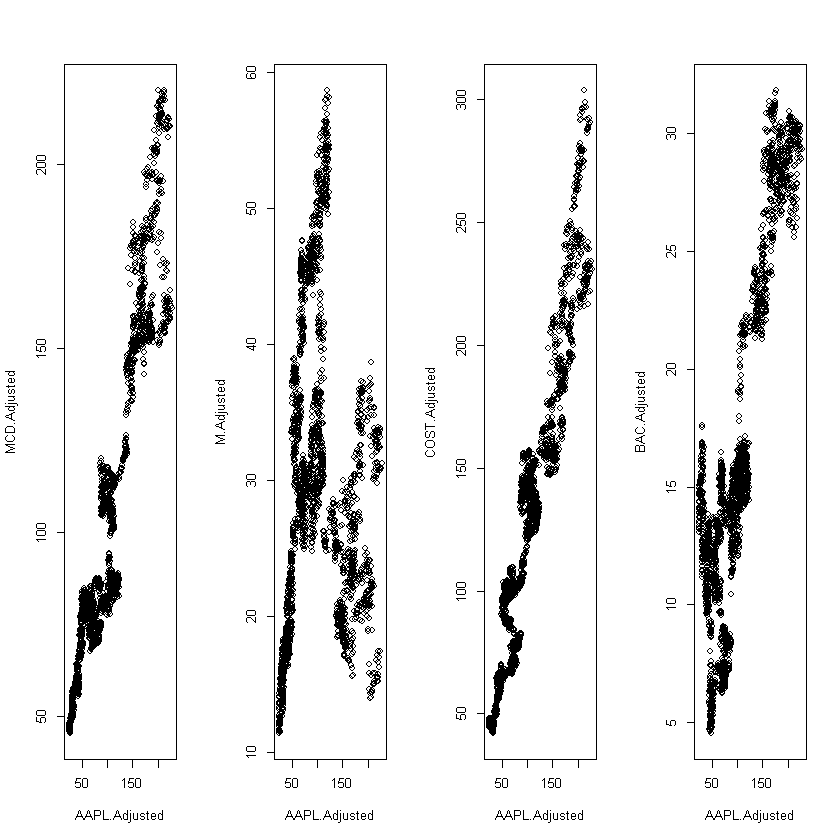

In [34]:
par(mfrow = c(1,4))
plot(AAPL_MCD)
plot(AAPL_M)
plot(AAPL_COST)
plot(AAPL_BAC)


### How about using trading volumn for indicator?
- initially, importing the data with those trading volumn.

In [17]:
AAPL.vol <- AAPL$AAPL.Volume
MCD.vol <- MCD$MCD.Volume
M.vol <- MCD$M.Volume
BAC.vol <- BAC$BAC.Volume
COST.vol <- COST$COST.Volume

In [19]:
# AAPL_M.vol <- data.frame(AAPL.vol,M.vol)
AAPL_MCD.vol <- data.frame(AAPL.vol,MCD.vol)
AAPL_BAC.vol <- data.frame(AAPL.vol,BAC.vol)
AAPL_COST.vol <- data.frame(AAPL.vol,COST.vol)

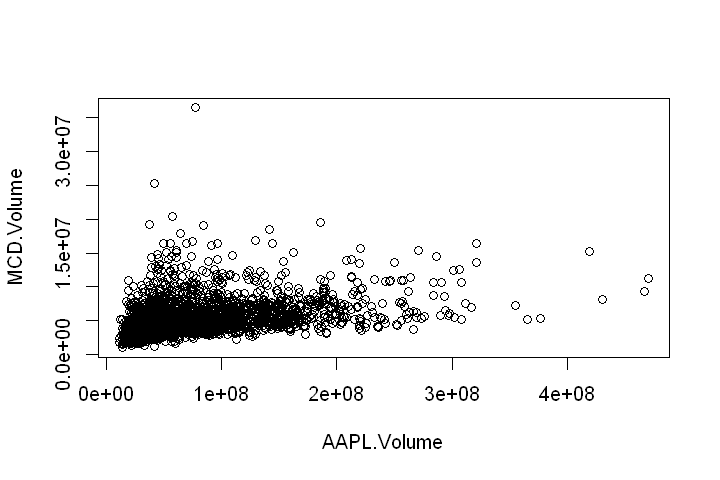

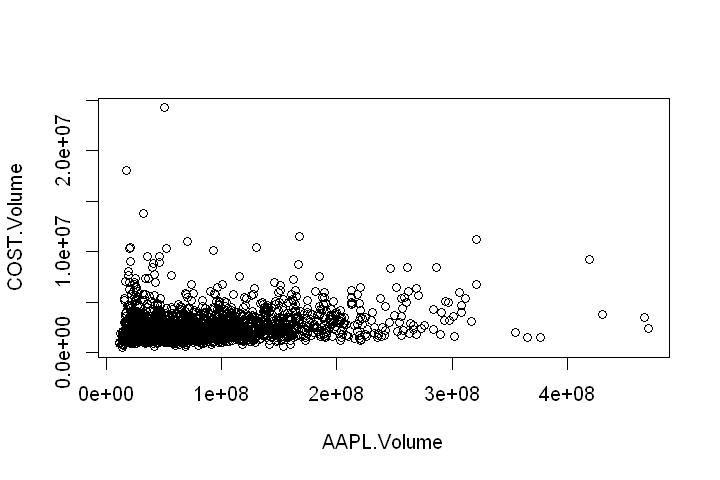

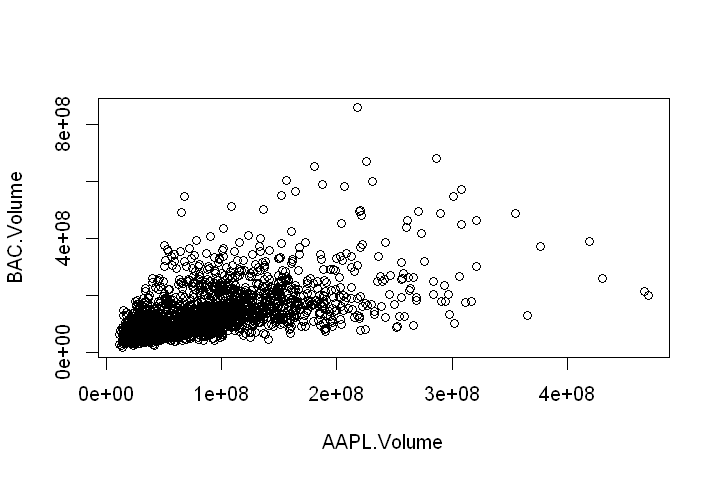

In [21]:
options(repr.plot.width = 6, repr.plot.height = 4)
plot(AAPL_MCD.vol)
# plot(AAPL_M.vol)
plot(AAPL_COST.vol)
plot(AAPL_BAC.vol)

### 2. Normalization